# Shop Customer - Clustering 

[**Data by SHRUTI_IYYER from Kaggle**](https://www.kaggle.com/datasets/shrutimechlearn/customer-data)

A project to find different clusters of customers

*Import the most important libraries*

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importing the Dataset

In [59]:
dataset = pd.read_csv('Customers.csv')
dataset

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## K-Means Clustering

### using the Annual Income ($) and the Spending Score (1-100)

In [89]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Finding the optimal number of clusters with the **Elbow Method**

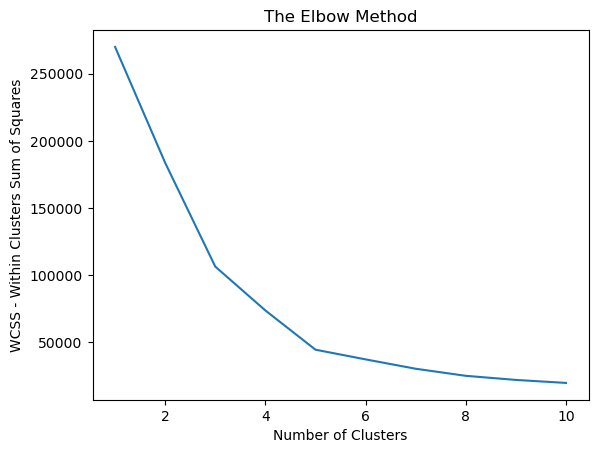

In [90]:
from sklearn.cluster import KMeans
# calculate the the within cluster sum of squares
wcss = []
for i in range(1, 11):
    # improve the clustering using the K-Means++ Method
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the Within Cluster Sum of Squares 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Clusters Sum of Squares')
plt.show()

The 'elbow' where the rapid falling curve drastically decrease its falling seem to be at **5 clusters**.

Training the K-Means Model on the Dataset:

In [91]:
kmeans = KMeans(n_clusters=5, init='k-means++')
prediction = kmeans.fit_predict(X)

Visualizing the clusters: 

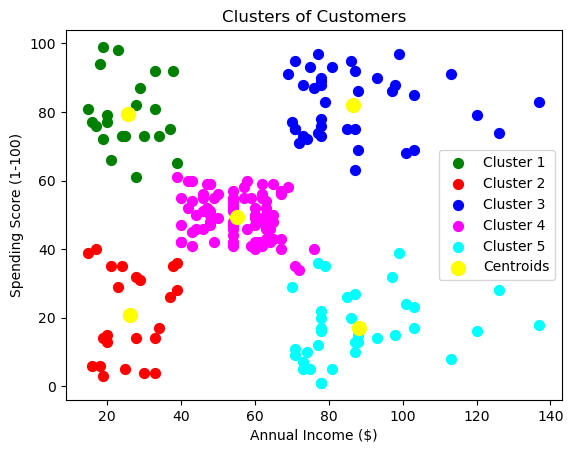

In [92]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], s=50, c='magenta', label='Cluster 4')
plt.scatter(X[prediction == 4, 0], X[prediction == 4, 1], s=50, c='cyan', label='Cluster 5')

# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

These different clusters represent different groups of customers with similar income and spending scores and could be used for improved marketing targeting. Cluster 1 spans customers with low income and high spending scores, Cluster 2 customers with low income and low spending score. Cluster 3 spans customers with high spending score and high income, Cluster 4 with medium income as well as medium spending score and Cluster 5 customers with high income but low spending score.

### using the Age and the Spending Score:

In [85]:
X = dataset.iloc[:, [2, 4]].values

Using the Elbow Method to find the optimal number of cluster again:

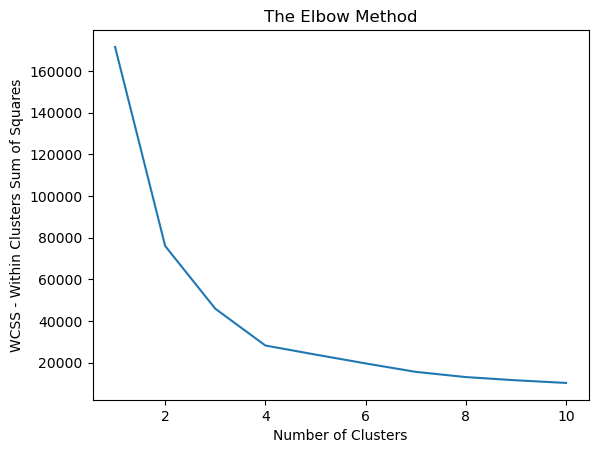

In [86]:
from sklearn.cluster import KMeans
# calculate the the within cluster sum of squares
wcss = []
for i in range(1, 11):
    # improve the clustering using the K-Means++ Method
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plot the Within Cluster Sum of Squares 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Within Clusters Sum of Squares')
plt.show()

Here the 'elbow' seems to be at 4 clusters.

In [87]:
# predicting the cluster
kmeans = KMeans(n_clusters=4, init='k-means++')
prediction = kmeans.fit_predict(X)

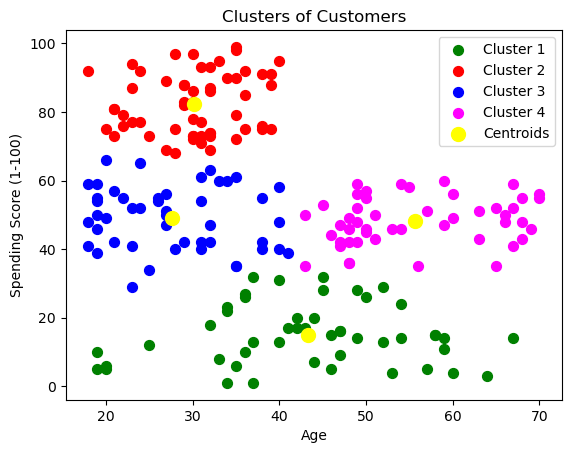

In [88]:


# visualization of the clustering
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], s=50, c='magenta', label='Cluster 4')

# plot the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Here the clusters are different from the clusters that can be found when using the Spending Score and the Income. Cluster 1 spans customers with low spending scores over all ages. Cluster 2 contains young customers with high spending scores, Cluster 3 young to middle-aged customers with medium spending scores and Cluster 4 middle-aged to old customers with medium spending score. It appears that there are no old customers with high spending score. 

### Hierarchical Clustering

### using the Annual Income ($) and the Spending Score (1-100)

In [93]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

using a Dendrogram to find the optimal number of clusters with the method of **minimum variance**

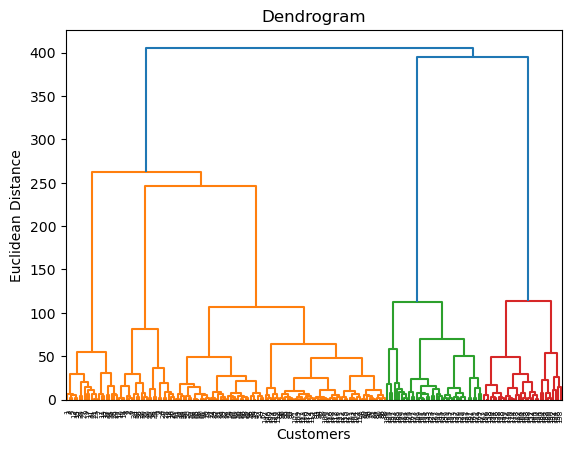

In [69]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [70]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
prediction = hc.fit_predict(X)

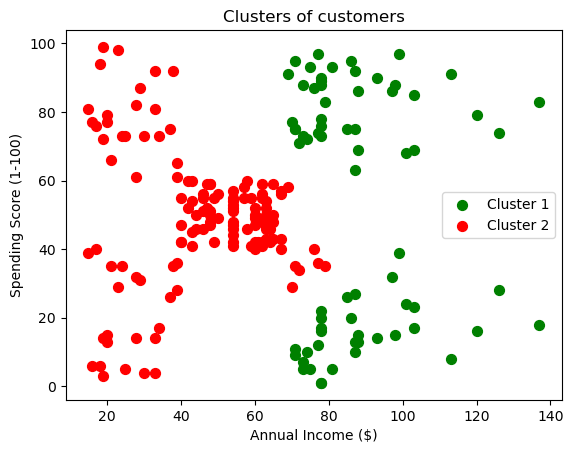

In [71]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### using the Age and the Spending Score (1-100)

In [72]:
X = dataset.iloc[:, [2, 4]].values

using a Dendrogram to find the optimal number of clusters with the method of **minimum variance**

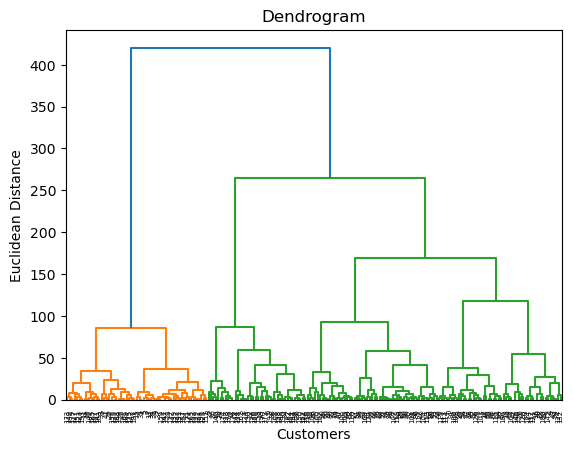

In [73]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
prediction = hc.fit_predict(X)

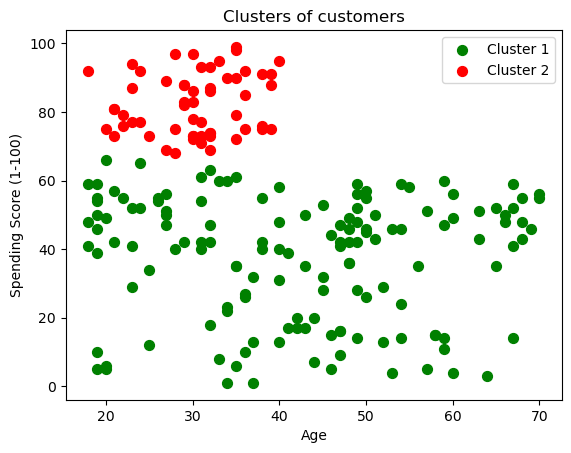

In [75]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s=50, c = 'green', label='Cluster 1')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s=50, c='red', label='Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()